## **8.1 Prep**

In [1]:
# !git clone https://github.com/NikkiSarah/ML_zoomcamp_2022

fatal: destination path 'ML_zoomcamp_2022' already exists and is not an empty directory.


In [2]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


## **8.2 Tensorflow and Keras**

In [3]:
# Note: this is actually chapter 8 in the course
# Note2: I used my own dataset for this chapter rather than the clothing dataset used in the course

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL.Image
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.applications.xception as xception

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

%matplotlib inline

2023-05-13 08:10:24.210461: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
# check the tensorflow (and keras) version
print(tf.__version__)
print(tf.keras.__version__)

2.9.1
2.9.0


In [5]:
# read in the data
root_dir = r'./data/animal_images_small'
train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

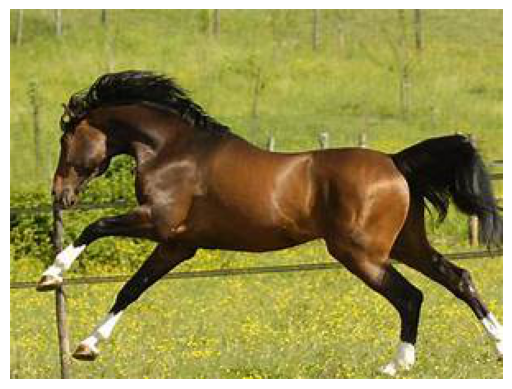

In [6]:
# view a horse image
horse_dir = os.path.join(train_dir, 'horse')
horse_image = os.listdir(horse_dir)[1]
img = PIL.Image.open(os.path.join(horse_dir, horse_image))
plt.imshow(img)
plt.axis("off");

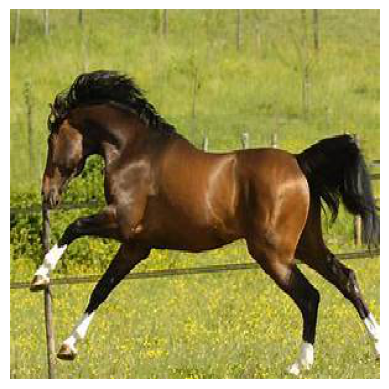

In [7]:
# view a re-sized version (CNNs expect images of a certain size)
img = load_img(os.path.join(horse_dir, horse_image), target_size=(299, 299))
plt.imshow(img)
plt.axis("off");

In [8]:
# view the image as a np array
img_arr = np.array(img)
print(img_arr.shape)
# 'u' means unsigned, which means the range is 0 to 255
# 'int8' means the array is an integer that takes 8 bits or 1 byte
print(img_arr.dtype)
print('-----')
print(img_arr)

(299, 299, 3)
uint8
-----
[[[162 168  80]
  [162 167  83]
  [155 159  83]
  ...
  [181 179 104]
  [172 170  95]
  [174 172  97]]

 [[154 160  72]
  [156 161  77]
  [151 155  79]
  ...
  [172 170  95]
  [165 163  88]
  [167 165  90]]

 [[154 160  72]
  [156 161  77]
  [151 155  79]
  ...
  [172 170  95]
  [165 163  88]
  [167 165  90]]

 ...

 [[128 117  61]
  [167 157  98]
  [180 170 108]
  ...
  [193 186 108]
  [190 181 102]
  [177 169  88]]

 [[128 117  61]
  [167 157  98]
  [180 170 108]
  ...
  [193 186 108]
  [190 181 102]
  [177 169  88]]

 [[125 125  51]
  [150 150  76]
  [183 181 106]
  ...
  [163 161  87]
  [155 153  76]
  [162 161  79]]]


## **8.3 Pre-trained CNNs**

In [ ]:
# use an xception model pre-trained on imagenet
model = xception.Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-05-13 02:01:29.576993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 02:01:29.648649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 02:01:29.649306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 02:01:29.650764: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [10]:
# make the image as a batch of one example
# (the model expects multiple images. To add more, just add them to the list)
X = np.array([img_arr])
print(X.shape)

(1, 299, 299, 3)


In [11]:
# model expects the input to look a certain way else the predictions won't make sense
# converted to a range of -1 to 1 from 0 to 255
X = xception.preprocess_input(X)
X[0]

array([[[ 0.27058828,  0.3176471 , -0.372549  ],
        [ 0.27058828,  0.30980396, -0.3490196 ],
        [ 0.21568632,  0.24705887, -0.3490196 ],
        ...,
        [ 0.41960788,  0.4039216 , -0.18431371],
        [ 0.34901965,  0.33333337, -0.25490195],
        [ 0.36470592,  0.34901965, -0.23921567]],

       [[ 0.20784318,  0.254902  , -0.4352941 ],
        [ 0.22352946,  0.26274514, -0.3960784 ],
        [ 0.18431377,  0.21568632, -0.38039213],
        ...,
        [ 0.34901965,  0.33333337, -0.25490195],
        [ 0.2941177 ,  0.27843142, -0.3098039 ],
        [ 0.30980396,  0.2941177 , -0.29411763]],

       [[ 0.20784318,  0.254902  , -0.4352941 ],
        [ 0.22352946,  0.26274514, -0.3960784 ],
        [ 0.18431377,  0.21568632, -0.38039213],
        ...,
        [ 0.34901965,  0.33333337, -0.25490195],
        [ 0.2941177 ,  0.27843142, -0.3098039 ],
        [ 0.30980396,  0.2941177 , -0.29411763]],

       ...,

       [[ 0.00392163, -0.08235294, -0.52156866],
        [ 0

In [12]:
pred = model.predict(X)
print(pred.shape)
print(pred[0, :10])

2023-05-13 02:01:34.765296: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-05-13 02:01:36.665765: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 02:01:36.666287: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 02:01:36.666327: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-13 02:01:36.667350: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 02:01:36.667438: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 6s 6s/step
(1, 1000)
[0.00030356 0.00024454 0.00045136 0.00036132 0.00034136 0.00050322
 0.00034656 0.00137723 0.00034446 0.00073979]


In [13]:
# so the top class is 'sorrel' from imagenet (the classes are imagenet classes, NOT our classes)
# this indicates that imagenet classes aren't particularly useful for our dataset
print(xception.decode_predictions(pred))

[[('n02389026', 'sorrel', 0.42224538), ('n02091831', 'Saluki', 0.021708384), ('n02091134', 'whippet', 0.0157683), ('n02091244', 'Ibizan_hound', 0.0070904167), ('n02110806', 'basenji', 0.0055065034)]]


## **8.4 Transfer Learning**

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=xception.preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=xception.preprocess_input)

# small images mean model training is faster (so can iterate/experiment faster as well)
train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32
)

val_ds = val_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False    # note that the validation set isn't shuffled
)

Found 3030 images belonging to 10 classes.
Found 350 images belonging to 10 classes.


In [15]:
# identify the classes
train_ds.class_indices

{'butterfly': 0,
 'cat': 1,
 'chicken': 2,
 'cow': 3,
 'dog': 4,
 'elephant': 5,
 'horse': 6,
 'sheep': 7,
 'spider': 8,
 'squirrel': 9}

In [16]:
!ls -l ./data/animal_images_small/train

total 252
drwxrwsr-x 2 jovyan jovyan 40960 Feb 19 03:24 butterfly
drwxrwsr-x 2 jovyan jovyan 12288 Feb 19 03:24 cat
drwxrwsr-x 2 jovyan jovyan 12288 Feb 19 03:24 chicken
drwxrwsr-x 2 jovyan jovyan 20480 Feb 19 03:24 cow
drwxrwsr-x 2 jovyan jovyan 20480 Feb 19 03:24 dog
drwxrwsr-x 2 jovyan jovyan 36864 Feb 19 03:24 elephant
drwxrwsr-x 2 jovyan jovyan 20480 Feb 19 03:24 horse
drwxrwsr-x 2 jovyan jovyan 36864 Feb 19 03:24 sheep
drwxrwsr-x 2 jovyan jovyan 36864 Feb 19 03:24 spider
drwxrwsr-x 2 jovyan jovyan 20480 Feb 19 03:24 squirrel


In [17]:
X, y = next(train_ds)
print(X.shape)
print('-----')
X

(32, 150, 150, 3)
-----


array([[[[ 0.70980394,  0.45098042,  0.11372554],
         [ 0.7176471 ,  0.45882356,  0.12156868],
         [ 0.7254902 ,  0.4666667 ,  0.12941182],
         ...,
         [ 0.8039216 ,  0.58431375,  0.20784318],
         [ 0.8039216 ,  0.58431375,  0.20784318],
         [ 0.79607844,  0.5764706 ,  0.20000005]],

        [[ 0.70980394,  0.45098042,  0.11372554],
         [ 0.7176471 ,  0.45882356,  0.12156868],
         [ 0.7254902 ,  0.4666667 ,  0.12941182],
         ...,
         [ 0.8039216 ,  0.58431375,  0.20784318],
         [ 0.8039216 ,  0.58431375,  0.20784318],
         [ 0.79607844,  0.5764706 ,  0.20000005]],

        [[ 0.7176471 ,  0.45882356,  0.10588241],
         [ 0.7254902 ,  0.4666667 ,  0.11372554],
         [ 0.7254902 ,  0.4666667 ,  0.11372554],
         ...,
         [ 0.8039216 ,  0.58431375,  0.20784318],
         [ 0.8039216 ,  0.58431375,  0.20784318],
         [ 0.79607844,  0.5764706 ,  0.20000005]],

        ...,

        [[-0.90588236, -0.9529412 , -0

In [18]:
# one-hot encoding for the labels so first photo is a squirrel, second is a chicken, third is a dog etc
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
# train a base model: keep/freeze the convolutional layers but retrain the final dense layers
base_model = xception.Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# when the model is trained, only want to extract the vector representation
# i.e don't want to train the convolutional layers
base_model.trainable = False

In [20]:
# create a new top
# specify the inputs
inputs = keras.Input(shape=(150, 150, 3))
# specify the number of output classes
num_classes = len(train_ds.class_indices)

# not enough to say base_model.trainable = False
base = base_model(inputs, training=False)
# turn base into vectors
vectors = keras.layers.GlobalAveragePooling2D()(base)
# turn the vectors into predictions
outputs = keras.layers.Dense(num_classes)(vectors)

model = keras.Model(inputs, outputs)
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [21]:
print(preds.shape)
print('-----')
# model has just been initialised with random numbers (and not trained yet), which is why these are nonsensical
print(preds[0])

(32, 10)
-----
[-0.79414785 -0.36151797  0.06243777  0.09323579 -0.00912152  0.5524549
 -1.1674027   0.7627505   0.11997881 -0.57166195]


In [22]:
learning_rate = 0.01
optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
# loss identifies whether changing the weights resulted in a better model
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimiser, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
95/95 [==============================] - 16s 150ms/step - loss: 0.8742 - accuracy: 0.8281 - val_loss: 0.6980 - val_accuracy: 0.8771
Epoch 2/10
95/95 [==============================] - 11s 112ms/step - loss: 0.3177 - accuracy: 0.9353 - val_loss: 0.6766 - val_accuracy: 0.8857
Epoch 3/10
95/95 [==============================] - 11s 112ms/step - loss: 0.1190 - accuracy: 0.9673 - val_loss: 0.7945 - val_accuracy: 0.8943
Epoch 4/10
95/95 [==============================] - 11s 113ms/step - loss: 0.0557 - accuracy: 0.9848 - val_loss: 0.5944 - val_accuracy: 0.9029
Epoch 5/10
95/95 [==============================] - 11s 111ms/step - loss: 0.0644 - accuracy: 0.9812 - val_loss: 0.6435 - val_accuracy: 0.9171
Epoch 6/10
95/95 [==============================] - 11s 110ms/step - loss: 0.0244 - accuracy: 0.9914 - val_loss: 0.6677 - val_accuracy: 0.9171
Epoch 7/10
95/95 [==============================] - 11s 111ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.6194 - val_accuracy: 0.9114

In [24]:
history.history

{'loss': [0.87416672706604,
  0.3176686763763428,
  0.11904288828372955,
  0.05565156415104866,
  0.06435452401638031,
  0.024436820298433304,
  0.02393457666039467,
  0.035110991448163986,
  0.06749879568815231,
  0.04007621854543686],
 'accuracy': [0.828052818775177,
  0.9353135228157043,
  0.9673267602920532,
  0.9848184585571289,
  0.9811881184577942,
  0.9914191365242004,
  0.9920791983604431,
  0.9904290437698364,
  0.9834983348846436,
  0.9887788891792297],
 'val_loss': [0.6980276703834534,
  0.6766189932823181,
  0.7944942712783813,
  0.5943657755851746,
  0.6434644460678101,
  0.6677147746086121,
  0.6193826198577881,
  0.688566267490387,
  0.730939507484436,
  0.8041601777076721],
 'val_accuracy': [0.8771428465843201,
  0.8857142925262451,
  0.8942857384681702,
  0.9028571248054504,
  0.9171428680419922,
  0.9171428680419922,
  0.9114285707473755,
  0.9200000166893005,
  0.9200000166893005,
  0.9285714030265808]}

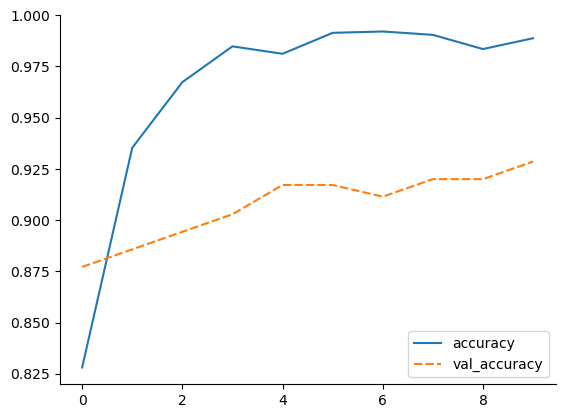

In [25]:
# note clearly overfitting
history_df = pd.DataFrame(history.history)
sns.lineplot(history_df[['accuracy', 'val_accuracy']])
sns.despine();

## **8.5 Adjusting the Learning Rate**

Like ML models such as XGBoost, this is the most important hyperparameter to tune. Need to find the right balance between learning too fast (and hence overfitting the data) but not learning too slow (and underfitting the data).

In [26]:
def make_model(learning_rate=0.01):
    base_model = xception.Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False
    num_classes = len(train_ds.class_indices)
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes)(vectors)
    model = keras.Model(inputs, outputs)

    optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimiser,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [27]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
95/95 [==============================] - 14s 121ms/step - loss: 1.7720 - accuracy: 0.4261 - val_loss: 1.1070 - val_accuracy: 0.7143
Epoch 2/10
95/95 [==============================] - 11s 111ms/step - loss: 0.9116 - accuracy: 0.7977 - val_loss: 0.6715 - val_accuracy: 0.8514
Epoch 3/10
95/95 [==============================] - 11s 112ms/step - loss: 0.6191 - accuracy: 0.8604 - val_loss: 0.5119 - val_accuracy: 0.8829
Epoch 4/10
95/95 [==============================] - 11s 112ms/step - loss: 0.4877 - accuracy: 0.8878 - val_loss: 0.4271 - val_accuracy: 0.8971
Epoch 5/10
95/95 [==============================] - 11s 112ms/step - loss: 0.4127 - accuracy: 0.9040 - val_loss: 0.3770 - val_accuracy: 0.9057
Epoch 6/10
95/95 [==============================] - 11s 112ms/step - loss: 0.3627 - accuracy: 0.9119 - val_loss: 0.3475 - val_accuracy: 0.9057
Epoch 7/10
95/95 [==============================] - 11s 111ms/step - loss: 0.3265 - accuracy: 0.9172 - val_loss: 0.3295 - val_accuracy:

In [28]:
for lr, hist in scores.items():
    print(lr)
    print(hist)

0.0001
{'loss': [1.772027611732483, 0.9115975499153137, 0.6191383004188538, 0.4876599907875061, 0.41266852617263794, 0.3627038598060608, 0.3264840245246887, 0.29722991585731506, 0.2747369706630707, 0.2552589178085327], 'accuracy': [0.4260725975036621, 0.7976897954940796, 0.8603960275650024, 0.8877887725830078, 0.9039604067802429, 0.9118812084197998, 0.9171617031097412, 0.9270626902580261, 0.9303630590438843, 0.9343234300613403], 'val_loss': [1.1069899797439575, 0.6714577078819275, 0.5119204521179199, 0.42714616656303406, 0.3769884705543518, 0.3475244343280792, 0.3295375108718872, 0.30989253520965576, 0.3006650507450104, 0.2868782579898834], 'val_accuracy': [0.7142857313156128, 0.8514285683631897, 0.8828571438789368, 0.8971428275108337, 0.9057142734527588, 0.9057142734527588, 0.9057142734527588, 0.9142857193946838, 0.9028571248054504, 0.9171428680419922]}
0.001
{'loss': [0.6078498959541321, 0.2277715653181076, 0.15287218987941742, 0.11173083633184433, 0.08463557809591293, 0.064598366618

In [29]:
scores_df = pd.DataFrame.from_dict(scores, orient='columns')
train_acc_df = scores_df.iloc[[1]]

l1 = train_acc_df.loc[:, 0.0001].tolist()
l2 = train_acc_df.loc[:, 0.001].tolist()
l3 = train_acc_df.loc[:, 0.01].tolist()
l4 = train_acc_df.loc[:, 0.1].tolist()

s1 = pd.Series([val for sublist in l1 for val in sublist], name='0.0001')
s2 = pd.Series([val for sublist in l2 for val in sublist], name='0.001')
s3 = pd.Series([val for sublist in l3 for val in sublist], name='0.01')
s4 = pd.Series([val for sublist in l4 for val in sublist], name='0.1')

train_acc_df = pd.DataFrame([s1, s2, s3, s4]).T

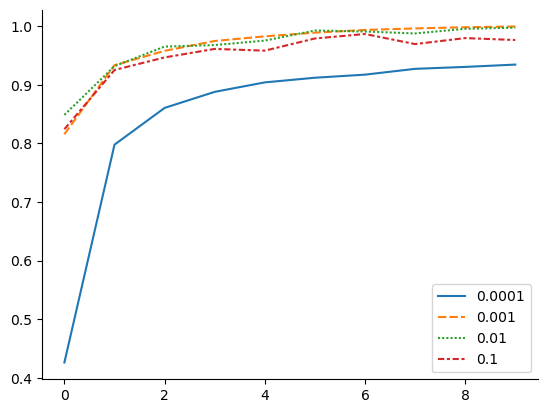

In [30]:
# training acccuracy plot
sns.lineplot(train_acc_df)
sns.despine();

In [31]:
scores_df = pd.DataFrame.from_dict(scores, orient='columns')
val_acc_df = scores_df.iloc[[3]]

l1 = val_acc_df.loc[:, 0.0001].tolist()
l2 = val_acc_df.loc[:, 0.001].tolist()
l3 = val_acc_df.loc[:, 0.01].tolist()
l4 = val_acc_df.loc[:, 0.1].tolist()

s1 = pd.Series([val for sublist in l1 for val in sublist], name='0.0001')
s2 = pd.Series([val for sublist in l2 for val in sublist], name='0.001')
s3 = pd.Series([val for sublist in l3 for val in sublist], name='0.01')
s4 = pd.Series([val for sublist in l4 for val in sublist], name='0.1')

val_acc_df = pd.DataFrame([s1, s2, s3, s4]).T

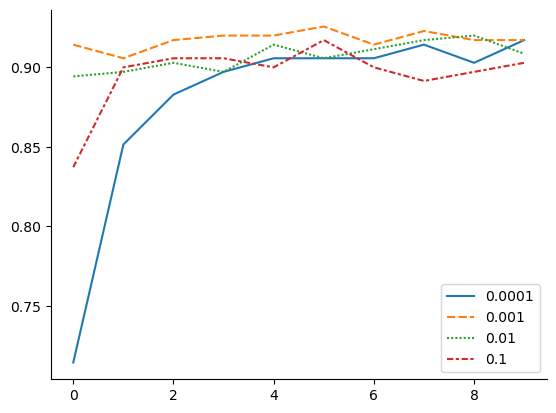

In [32]:
# validation accuracy plot
sns.lineplot(val_acc_df)
sns.despine();

A learning rate of 0.0001 is too small. A learning rate of 0.1 is marginal. The best learning rate is 0.001 as it's accuracy is the highest consistently over all epochs.

In [33]:
learning_rate = 0.001

## **8.6 Checkpoints**

This is a way of saving the model after each epoch or when certain conditions are met e.g. achieving the best peformance so far.

In [34]:
model.save_weights('model_v1.h5', save_format='h5')

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.4f}.h5',
    save_best_only=True,    # otherwise the model will be saved after every epoch
    monitor='val_accuracy',
    mode='max'    # this would be 'min' if interested in minimising the loss for example
)

In [35]:
model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
95/95 [==============================] - 14s 128ms/step - loss: 0.6065 - accuracy: 0.8244 - val_loss: 0.3037 - val_accuracy: 0.9086
Epoch 2/10
95/95 [==============================] - 11s 115ms/step - loss: 0.2251 - accuracy: 0.9337 - val_loss: 0.2772 - val_accuracy: 0.9114
Epoch 3/10
95/95 [==============================] - 11s 111ms/step - loss: 0.1535 - accuracy: 0.9611 - val_loss: 0.2601 - val_accuracy: 0.9086
Epoch 4/10
95/95 [==============================] - 11s 114ms/step - loss: 0.1119 - accuracy: 0.9723 - val_loss: 0.2597 - val_accuracy: 0.9229
Epoch 5/10
95/95 [==============================] - 11s 111ms/step - loss: 0.0848 - accuracy: 0.9838 - val_loss: 0.2447 - val_accuracy: 0.9229
Epoch 6/10
95/95 [==============================] - 11s 111ms/step - loss: 0.0656 - accuracy: 0.9894 - val_loss: 0.2637 - val_accuracy: 0.9200
Epoch 7/10
95/95 [==============================] - 11s 111ms/step - loss: 0.0505 - accuracy: 0.9941 - val_loss: 0.2616 - val_accuracy: 0.9229

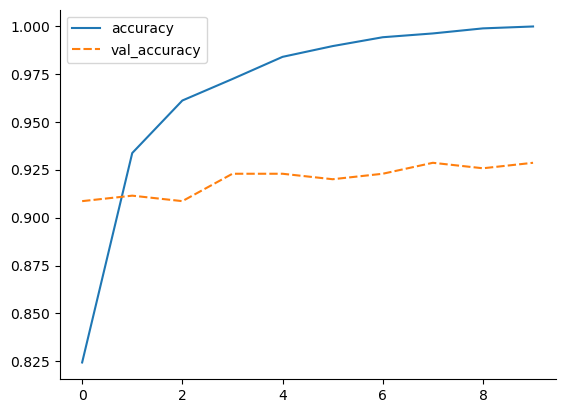

In [36]:
history_df = pd.DataFrame(history.history)
sns.lineplot(history_df[['accuracy', 'val_accuracy']])
sns.despine();
# ... still overfitting

## **8.6 Adding More Layers**

More layers means more model complexity, but not necessarily better model performance.

In [47]:
def make_model(learning_rate=0.001, units=100):
    base_model = xception.Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False
    num_classes = len(train_ds.class_indices)
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # add extra dense layer
    dense = keras.layers.Dense(units, activation='relu')(vectors)
    outputs = keras.layers.Dense(num_classes)(dense)
    
    model = keras.Model(inputs, outputs)

    optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimiser,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [48]:
scores = {}

for units in [10, 100, 1000]:
    print(units)
    
    model = make_model(learning_rate=learning_rate, units=units)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[units] = history.history
    
    print()
    print()

10
Epoch 1/10
95/95 [==============================] - 13s 119ms/step - loss: 1.3588 - accuracy: 0.5063 - val_loss: 0.8384 - val_accuracy: 0.7514
Epoch 2/10
95/95 [==============================] - 11s 112ms/step - loss: 0.5286 - accuracy: 0.8746 - val_loss: 0.4052 - val_accuracy: 0.8886
Epoch 3/10
95/95 [==============================] - 11s 112ms/step - loss: 0.2520 - accuracy: 0.9347 - val_loss: 0.3338 - val_accuracy: 0.9086
Epoch 4/10
95/95 [==============================] - 11s 111ms/step - loss: 0.1593 - accuracy: 0.9578 - val_loss: 0.3119 - val_accuracy: 0.9114
Epoch 5/10
95/95 [==============================] - 11s 112ms/step - loss: 0.1027 - accuracy: 0.9733 - val_loss: 0.2881 - val_accuracy: 0.9143
Epoch 6/10
95/95 [==============================] - 11s 112ms/step - loss: 0.0717 - accuracy: 0.9858 - val_loss: 0.2901 - val_accuracy: 0.9229
Epoch 7/10
95/95 [==============================] - 11s 113ms/step - loss: 0.0538 - accuracy: 0.9917 - val_loss: 0.3029 - val_accuracy: 0.9

In [49]:
scores_df = pd.DataFrame.from_dict(scores, orient='columns')
train_acc_df = scores_df.iloc[[1]]

l1 = train_acc_df.loc[:, 10].tolist()
l2 = train_acc_df.loc[:, 100].tolist()
l3 = train_acc_df.loc[:, 1000].tolist()

s1 = pd.Series([val for sublist in l1 for val in sublist], name='10')
s2 = pd.Series([val for sublist in l2 for val in sublist], name='100')
s3 = pd.Series([val for sublist in l3 for val in sublist], name='1000')

train_acc_df = pd.DataFrame([s1, s2, s3]).T

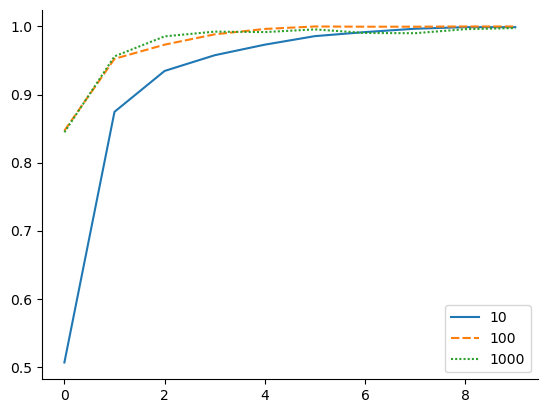

In [50]:
# training acccuracy plot
sns.lineplot(train_acc_df)
sns.despine();

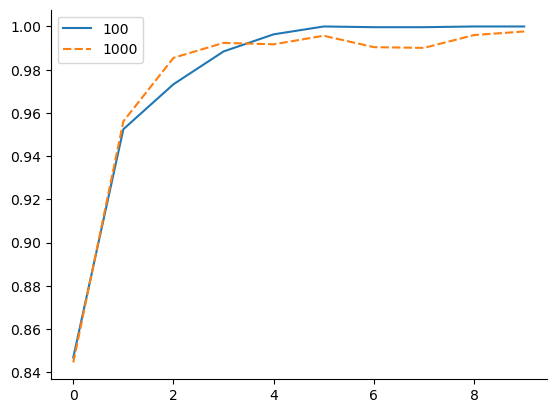

In [57]:
sns.lineplot(train_acc_df[['100', '1000']])
sns.despine();

In [51]:
scores_df = pd.DataFrame.from_dict(scores, orient='columns')
val_acc_df = scores_df.iloc[[3]]

l1 = val_acc_df.loc[:, 10].tolist()
l2 = val_acc_df.loc[:, 100].tolist()
l3 = val_acc_df.loc[:, 1000].tolist()

s1 = pd.Series([val for sublist in l1 for val in sublist], name='10')
s2 = pd.Series([val for sublist in l2 for val in sublist], name='100')
s3 = pd.Series([val for sublist in l3 for val in sublist], name='1000')

val_acc_df = pd.DataFrame([s1, s2, s3]).T

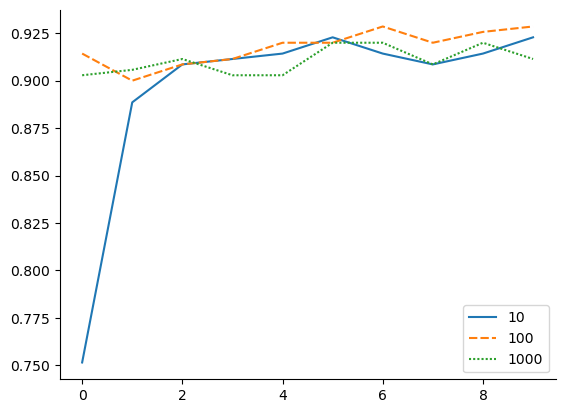

In [52]:
# validation accuracy plot
sns.lineplot(val_acc_df)
sns.despine();

An extra dense layer with only 10 units is the worst performer. On the training data, the model with the 100 units marginally outperforms the one with 1000 units, particularly in later epochs. This is repeated in the validation data, so we'll choose the model with 100 units.

## **8.7 Regularisation and Dropout**

Regularisation can be important as it help prevent the model from overfitting to something that might not actually exist. Note that when you add a feature like dropout, you will usually need to increase the number of training epochs as the model is now actively prevented from using part of the model to learn the patters in the data (i.e. part of the hidden layer is frozen).

In [8]:
def make_model(learning_rate=0.001, units=100, dropout_rate=0.2):
    base_model = xception.Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False
    num_classes = len(train_ds.class_indices)
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # add extra dense layer
    dense = keras.layers.Dense(units, activation='relu')(vectors)
    # and a dropout layer
    drop = keras.layers.Dropout(dropout_rate)(dense)
    outputs = keras.layers.Dense(num_classes)(drop)
    
    model = keras.Model(inputs, outputs)

    optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimiser,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [68]:
model.save_weights('model_v3.h5', save_format='h5')

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.4f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

scores = {}

for dropout_rate in [0.0, 0.2, 0.5, 0.8]:
    print(dropout_rate)
    
    model = make_model(learning_rate=learning_rate, units=units, dropout_rate=dropout_rate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])
    scores[dropout_rate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
95/95 [==============================] - 14s 121ms/step - loss: 0.4795 - accuracy: 0.8637 - val_loss: 0.3036 - val_accuracy: 0.9000
Epoch 2/30
95/95 [==============================] - 11s 113ms/step - loss: 0.1417 - accuracy: 0.9508 - val_loss: 0.3411 - val_accuracy: 0.9114
Epoch 3/30
95/95 [==============================] - 11s 111ms/step - loss: 0.0595 - accuracy: 0.9782 - val_loss: 0.3244 - val_accuracy: 0.9171
Epoch 4/30
95/95 [==============================] - 11s 113ms/step - loss: 0.0283 - accuracy: 0.9944 - val_loss: 0.3095 - val_accuracy: 0.9143
Epoch 5/30
95/95 [==============================] - 11s 112ms/step - loss: 0.0086 - accuracy: 0.9990 - val_loss: 0.3532 - val_accuracy: 0.9171
Epoch 6/30
95/95 [==============================] - 11s 112ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3403 - val_accuracy: 0.9143
Epoch 7/30
95/95 [==============================] - 11s 113ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3347 - val_accuracy: 0.

In [69]:
scores_df = pd.DataFrame.from_dict(scores, orient='columns')
train_acc_df = scores_df.iloc[[1]]

l1 = train_acc_df.loc[:, 0.0].tolist()
l2 = train_acc_df.loc[:, 0.2].tolist()
l3 = train_acc_df.loc[:, 0.5].tolist()
l4 = train_acc_df.loc[:, 0.8].tolist()

s1 = pd.Series([val for sublist in l1 for val in sublist], name='0.0')
s2 = pd.Series([val for sublist in l2 for val in sublist], name='0.2')
s3 = pd.Series([val for sublist in l3 for val in sublist], name='0.5')
s4 = pd.Series([val for sublist in l4 for val in sublist], name='0.8')

train_acc_df = pd.DataFrame([s1, s2, s3, s4]).T

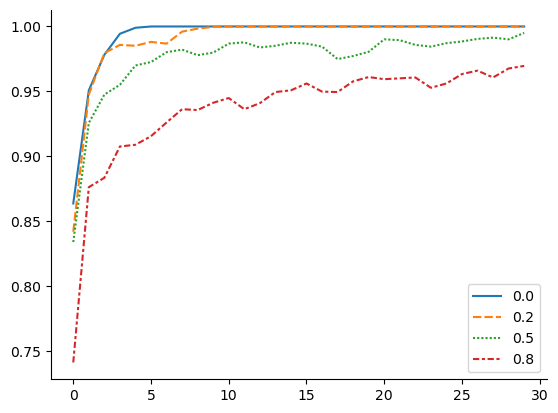

In [70]:
# training acccuracy plot
sns.lineplot(train_acc_df)
sns.despine();

In [73]:
scores_df = pd.DataFrame.from_dict(scores, orient='columns')
val_acc_df = scores_df.iloc[[3]]

l1 = val_acc_df.loc[:, 0.0].tolist()
l2 = val_acc_df.loc[:, 0.2].tolist()
l3 = val_acc_df.loc[:, 0.5].tolist()
l4 = val_acc_df.loc[:, 0.8].tolist()

s1 = pd.Series([val for sublist in l1 for val in sublist], name='0.0')
s2 = pd.Series([val for sublist in l2 for val in sublist], name='0.2')
s3 = pd.Series([val for sublist in l3 for val in sublist], name='0.5')
s4 = pd.Series([val for sublist in l4 for val in sublist], name='0.8')

val_acc_df = pd.DataFrame([s1, s2, s3, s4]).T

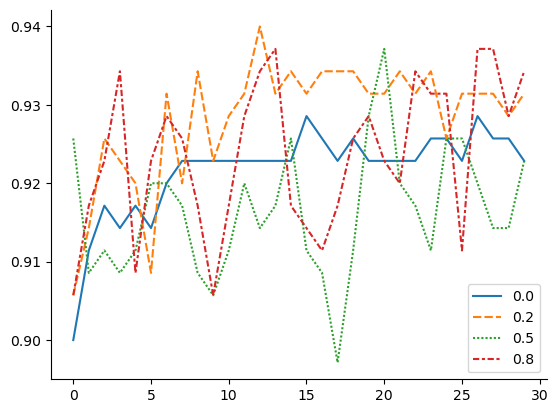

In [74]:
# validation accuracy plot
sns.lineplot(val_acc_df)
sns.despine();

The performance is very noisy and all over the place, but it looks like a droprate of 0.2 in general was the best on the validation an equally as good as no dropout on the training data.

## **8.8 Data Augmentation**

Choosing augmentations:
- use judgement to what you expect to see/what makes sense; for example, are the objects always centred or not (in which case you can shift, rotate etc).
- can be treated as a tuneable hyperparameter (e.g. add the augmentation and train the model for sufficient epochs until it's clear whether or not the augmentation is helpful)

Augmentations should only be applied to the training data. The validation should be left untouched so that models can be compared. Augmentation is semi-random, so it makes it difficult to compare the performance of different models. Plus, we can consider that the validation dataset is the dataset uploaded by users.

Also, note that for each iteration/step within each epoch that the model is being trained, the CPU is used to apply the augmentations and the GPU is used to fit the model, the GPU doesn't do everything. This is why the trainining is slower and the GPU utilisation rate drops. However, one way of improving performance and reducing model training time would be to prepare the next batch of data at the same time the previous batch is being trained on as CPU and GPU usage can run in parallel.

In [6]:
train_gen = ImageDataGenerator(
    preprocessing_function=xception.preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
)
val_gen = ImageDataGenerator(preprocessing_function=xception.preprocess_input)

# small images mean model training is faster (so can iterate/experiment faster as well)
train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32
)

val_ds = val_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False    # note that the validation set isn't shuffled
)

Found 3030 images belonging to 10 classes.
Found 350 images belonging to 10 classes.


In [9]:
# keep the same model as before, but train for 50 epochs
model.save_weights('model_v4.h5', save_format='h5')

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.4f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

model = make_model(learning_rate=0.001, units=100, dropout_rate=0.2)
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])

2023-05-13 08:11:18.975298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 08:11:18.981863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 08:11:18.982490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-13 08:11:18.983545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Epoch 1/50


2023-05-13 08:11:25.642776: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-05-13 08:11:27.664352: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 08:11:27.664865: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 08:11:27.664905: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-13 08:11:27.665557: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-13 08:11:27.665660: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


95/95 [==============================] - 33s 275ms/step - loss: 0.9581 - accuracy: 0.6838 - val_loss: 0.3037 - val_accuracy: 0.9114
Epoch 2/50
95/95 [==============================] - 23s 239ms/step - loss: 0.5705 - accuracy: 0.8172 - val_loss: 0.2855 - val_accuracy: 0.9257
Epoch 3/50
95/95 [==============================] - 23s 237ms/step - loss: 0.4741 - accuracy: 0.8482 - val_loss: 0.2933 - val_accuracy: 0.9086
Epoch 4/50
95/95 [==============================] - 23s 240ms/step - loss: 0.4116 - accuracy: 0.8683 - val_loss: 0.3000 - val_accuracy: 0.9143
Epoch 5/50
95/95 [==============================] - 23s 239ms/step - loss: 0.3898 - accuracy: 0.8736 - val_loss: 0.3228 - val_accuracy: 0.9057
Epoch 6/50
95/95 [==============================] - 23s 238ms/step - loss: 0.3458 - accuracy: 0.8842 - val_loss: 0.2680 - val_accuracy: 0.9171
Epoch 7/50
95/95 [==============================] - 23s 237ms/step - loss: 0.3635 - accuracy: 0.8812 - val_loss: 0.2783 - val_accuracy: 0.9143
Epoch 8/50

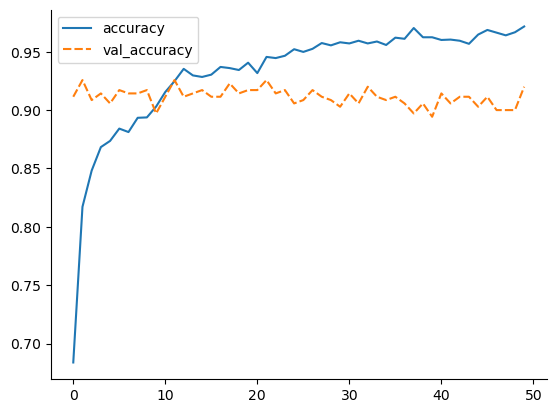

In [10]:
history_df = pd.DataFrame(history.history)
sns.lineplot(history_df[['accuracy', 'val_accuracy']])
sns.despine();

## **8.9 Larger Images**

Sometimes data augmentation makes more sense and/or results in better performance when the images are larger as more differences can be observed.

In [11]:
def make_model(input_size=150, learning_rate=0.001, units=100, dropout_rate=0.2):
    base_model = xception.Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
    
    base_model.trainable = False
    num_classes = len(train_ds.class_indices)
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    dense = keras.layers.Dense(units, activation='relu')(vectors)
    drop = keras.layers.Dropout(dropout_rate)(dense)
    outputs = keras.layers.Dense(num_classes)(drop)
    
    model = keras.Model(inputs, outputs)

    optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimiser,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [13]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function=xception.preprocess_input,
    rotation_range=30,  # rotate image randomly in the range -num, +num
    shear_range=10.0,    # as above
    zoom_range=0.1,
    vertical_flip=True
)
val_gen = ImageDataGenerator(preprocessing_function=xception.preprocess_input)

train_ds = train_gen.flow_from_directory(
    train_dir,
    target_size=(input_size, input_size),
    batch_size=32
)

val_ds = val_gen.flow_from_directory(
    val_dir,
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3030 images belonging to 10 classes.
Found 350 images belonging to 10 classes.


In [16]:
# save this model
model.save_weights('model_v5.h5', save_format='h5')

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v5_{epoch:02d}_{val_accuracy:.4f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

model = make_model(input_size=299, learning_rate=0.001, units=100, dropout_rate=0.2)
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/30
95/95 [==============================] - 66s 672ms/step - loss: 0.6919 - accuracy: 0.8168 - val_loss: 0.1234 - val_accuracy: 0.9600
Epoch 2/30
95/95 [==============================] - 63s 661ms/step - loss: 0.2791 - accuracy: 0.9129 - val_loss: 0.0858 - val_accuracy: 0.9829
Epoch 3/30
95/95 [==============================] - 62s 653ms/step - loss: 0.2106 - accuracy: 0.9360 - val_loss: 0.0728 - val_accuracy: 0.9829
Epoch 4/30
95/95 [==============================] - 63s 659ms/step - loss: 0.1956 - accuracy: 0.9356 - val_loss: 0.0705 - val_accuracy: 0.9800
Epoch 5/30
95/95 [==============================] - 63s 665ms/step - loss: 0.1804 - accuracy: 0.9432 - val_loss: 0.0554 - val_accuracy: 0.9857
Epoch 6/30
95/95 [==============================] - 63s 658ms/step - loss: 0.1716 - accuracy: 0.9442 - val_loss: 0.0693 - val_accuracy: 0.9800
Epoch 7/30
95/95 [==============================] - 62s 647ms/step - loss: 0.1388 - accuracy: 0.9594 - val_loss: 0.0686 - val_accuracy: 0.9829

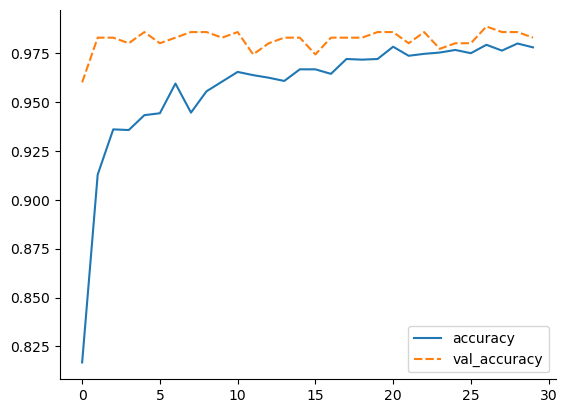

In [17]:
history_df = pd.DataFrame(history.history)
sns.lineplot(history_df[['accuracy', 'val_accuracy']])
sns.despine();